in the below lines of code we analyze an uber request database.Getting a ride from uber is beautiful in its simplicity,but there is a great deal of wrangling going on behind the screens 
Uber has a massive database of drivers, so as soon as you request a car, Uber’s algorithm goes right to work – in 15 seconds or less, it matches you with the driver closest to you. In the background Uber is storing data for each and every trip taken.

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import datetime
  
import time 

  

%matplotlib inline

In [229]:
uber_data = pd.read_csv('Uber Request Data.csv')
uber_data.head(20)



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


We get a general idea that the above data set is a record of uber rides from dates 11th to 15th of july month in the year 2016

In [230]:
type(uber_data)

pandas.core.frame.DataFrame

In [231]:
uber_data['Request id'].dtype

dtype('int64')

 now let's remove all the entries with missing data since missing data in cells hinder the process of visualization.


In [232]:
#checking if there are any missing values
(uber_data.astype(np.object) == '?').any()

Request id           False
Pickup point         False
Driver id            False
Status               False
Request timestamp    False
Drop timestamp       False
dtype: bool

As we can see above, there are no missing values in any of the cells, hence we can simply proceed.

In [233]:
#uber_data.dtypes
uber_data.shape

(6745, 6)

In [234]:
print(uber_data['Driver id'].unique().shape)

(301,)


we have a database of 301 unique driver ids.

In [235]:
print(uber_data['Request id'].unique().shape)

(6745,)


no duplicate entries found

In [236]:
uber_data.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

all the columns with type object are categorical variables. since they are categorical variables we need to ensure that each category has many samples to ease analysis. 

In [237]:
uber_data['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [238]:
#uber_data['Driver id'].value_counts()

In [239]:
uber_data['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

we see that the number of times no uber cars were available are greater than the number of times uber rides were canceled by the rider.

In [240]:
status_categories = {'Trip Completed':0, 'No Cars Available':1, 
                    'Cancelled':2}
uber_data['Status'] = [status_categories[x] for x in uber_data['Status']]
uber_data['Status'].value_counts()

0    2831
1    2650
2    1264
Name: Status, dtype: int64

now let us analyze the relationship

0- trip completed

1- no cars available

2-trip cancelled

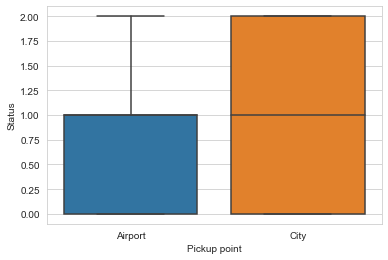

In [241]:
def plot_box(uber_data, col, col_y = 'Status'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=uber_data)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(uber_data, 'Pickup point')    

we observe from the above box plots that none of the trips with pickup location Airport gets cancelled, most of them get completed and very few of them lack availabiliy of car.
in city, trips completed,no cars available,cancelled trips are almost equally distributed as we see an equal distribution in quartiles 2 and 3 of city


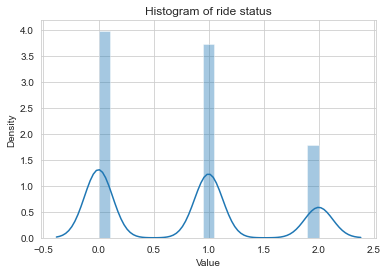

In [242]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(uber_data['Status'], 'ride status')

By the above histogram we can get to know that uber's services are unparalleled with since the number of cancellation of trips is less than half the number of completed trips
At the same time we notice that the number of trips where the cars weren't available is almost same as the number of completed trips.
*HENCE WE CONCLUDE THAT UBER CAN TO HIRE MORE NUMBER OF CARS TO EASE TRAVELLING*

In [243]:
uber_data['Status'].dtype
#uber_data['Request id'].dtype

dtype('int64')

In [244]:
uber_data['Driver id'].dtype

dtype('float64')

In [245]:
#x=(uber_data['Driver id'].unique()).value_counts()
#y= x.value_counts()

In [246]:
uber_data['Status'] = uber_data['Status'].astype(float)
uber_data['Status'].dtype
#uber_data['log_price'] = np.log(uber_data['Status'])
#hist_plot(uber_data['log_price'], 'log prices')

dtype('float64')

In [247]:
#uber_data['log_price'] = np.log(uber_data['Status'])
#hist_plot(uber_data['log_price'], 'log prices')

the scatter plots don't provide any useful data and hence is not a viable option for the analysis of our data
In the third plot, we see some sort of discontinuity and once again we can conclude that not alot of vwhicles are available
near the airport

In [248]:

uber_data[['Request date','Request time']]=uber_data['Request timestamp'].str.split(expand=True,)

uber_data[['Drop date','Drop time']]=uber_data['Drop timestamp'].str.split(expand=True,)

#uber_data['Request time'] = pd.Timestamp(uber_data['Request time'])
#uber_data['Drop time'] = pd.Timestamp(uber_data['Drop time'])

uber_data['Request time'] =uber_data['Request time'].str.split(':')
uber_data['Drop time'] =uber_data['Drop time'].str.split(':')

#uber_data['Drop time']=uber_data['Drop time'].str.join(',')
#uber_data['Request time'] =uber_data['Request time'].str.join(',')
#','.join(strings)
uber_data.head()
print(uber_data['Request time'])
# L_temp = []
# for i in range(len(uber_data['Request time'])):
#     L = []
#     try:
#         hour = int(uber_data['Drop time'][i][0]) - int(uber_data['Request time'][i][0])
#         minute = int(uber_data['Drop time'][i][1]) - int(uber_data['Request time'][i][1])
#         if(minute<0):
#             hour-= 1
#             minute+= 60
#         L.append(hour)
#         L.append(minute)
#         second = int(uber_data['Drop time'][i][2]) - int(uber_data['Request time'][i][2])
#         if(second<0):
#             second += 60
#             minute -= 1
#     #     print(i, uber_data['Drop time'][i])
#         L.append()
#     except:
#         pass
#     L_temp.append(L)
# uber_data['Diff Time'] = L_temp
# uber_data.head()

# uber_data['Request date'] =uber_data['Request date'].str.split('/')
# uber_data['Drop date'] =uber_data['Drop date'].str.split('/')
# L_temp = []
# for i in range(len(uber_data['Request date'])):
#     L = []
#     try:
#         day = int(uber_data['Drop date'][i][0]) - int(uber_data['Request date'][i][0])
#         month = int(uber_data['Drop date'][i][1]) - int(uber_data['Request date'][i][1])
#         if(minute<0):
#             hour-= 1
#             minute+= 60
#         L.append(hour)
#         L.append(minute)
#         year = int(uber_data['Drop date'][i][2]) - int(uber_data['Request datew'][i][2])
#         if(second<0):
#             second += 60
#             minute -= 1
#     #     print(i, uber_data['Drop time'][i])
#         L.append()
#     except:
#         pass
#     L_temp.append(L)
    

0           [11, 51]
1           [17, 57]
2            [9, 17]
3           [21, 08]
4       [08, 33, 16]
            ...     
6740    [23, 49, 03]
6741    [23, 50, 05]
6742    [23, 52, 06]
6743    [23, 54, 39]
6744    [23, 55, 03]
Name: Request time, Length: 6745, dtype: object


In [249]:
#uber_data['Request timestamp']=pd.Timestamp(uber_data['Request timestamp
#uber_data['Diff Time'].dtype

In [250]:

# uber_data['Request time'] = pd.Timestamp(uber_data['Request time'])
# uber_data['Drop time'] = pd.Timestamp(uber_data['Drop time'])
uber_data.head()

# uber_data['diff']=(uber_data['Drop time']-uber_data['Request time']).astype('timedelta64[h]')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Drop date,Drop time
0,619,Airport,1.0,0.0,11/7/2016 11:51,11/7/2016 13:00,11/7/2016,"[11, 51]",11/7/2016,"[13, 00]"
1,867,Airport,1.0,0.0,11/7/2016 17:57,11/7/2016 18:47,11/7/2016,"[17, 57]",11/7/2016,"[18, 47]"
2,1807,City,1.0,0.0,12/7/2016 9:17,12/7/2016 9:58,12/7/2016,"[9, 17]",12/7/2016,"[9, 58]"
3,2532,Airport,1.0,0.0,12/7/2016 21:08,12/7/2016 22:03,12/7/2016,"[21, 08]",12/7/2016,"[22, 03]"
4,3112,City,1.0,0.0,13-07-2016 08:33:16,13-07-2016 09:25:47,13-07-2016,"[08, 33, 16]",13-07-2016,"[09, 25, 47]"


In [251]:
# uber_data.head()
temp_list=[]
for i in range(len(uber_data['Request id'])):
    temp_list.append(uber_data['Request time'][i][0])

# temp_list.append(l)
# print(temp_list)
#print(temp_list)
uber_data['Request Hour'] = temp_list
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Drop date,Drop time,Request Hour
0,619,Airport,1.0,0.0,11/7/2016 11:51,11/7/2016 13:00,11/7/2016,"[11, 51]",11/7/2016,"[13, 00]",11
1,867,Airport,1.0,0.0,11/7/2016 17:57,11/7/2016 18:47,11/7/2016,"[17, 57]",11/7/2016,"[18, 47]",17
2,1807,City,1.0,0.0,12/7/2016 9:17,12/7/2016 9:58,12/7/2016,"[9, 17]",12/7/2016,"[9, 58]",9
3,2532,Airport,1.0,0.0,12/7/2016 21:08,12/7/2016 22:03,12/7/2016,"[21, 08]",12/7/2016,"[22, 03]",21
4,3112,City,1.0,0.0,13-07-2016 08:33:16,13-07-2016 09:25:47,13-07-2016,"[08, 33, 16]",13-07-2016,"[09, 25, 47]",08


In [252]:
uber_data['Request Hour']=uber_data['Request Hour'].astype(float)
uber_data['Request Hour'].dtype

dtype('float64')

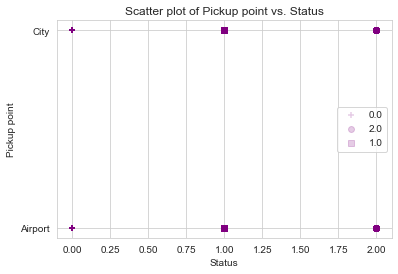

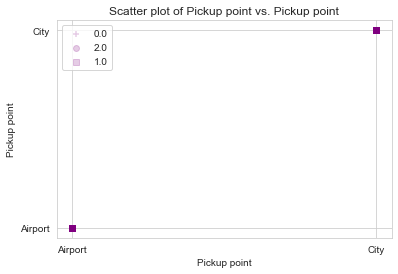

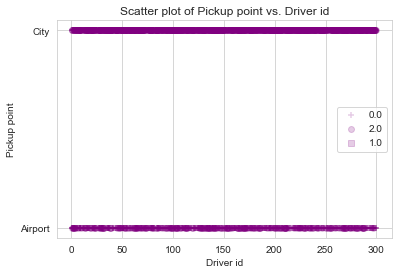

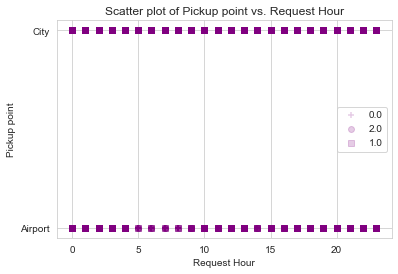

In [253]:
def plot_scatter_shape(uber_data, cols, shape_col = 'Status', col_y = 'Pickup point', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] 
    unique_cats = uber_data[shape_col].unique()
    for col in cols:
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats):
            temp = uber_data[uber_data[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'purple')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) 
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.legend()
        plt.show()
            
num_cols = ['Status','Pickup point','Driver id','Request Hour']
plot_scatter_shape(uber_data, num_cols)   
#we can conclude that the scatter plots are not that helpful

we cant determine much from the scatter plots

In [254]:

# uber_data['Request date'] = pd.to_datetime(uber_data['Request date'])
# #print(uber_data['Request date'])
# uber_data.head(50)


In [255]:
uber_data['Request date'].dtype

dtype('O')

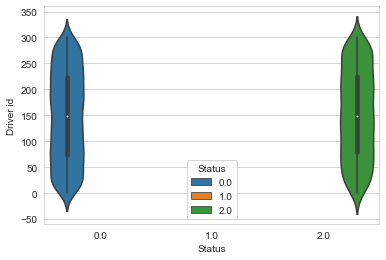

In [256]:

uber_data['Status'] = uber_data['Status'].astype(float)
uber_data['Status'].dtype
sns.violinplot(x=uber_data['Status'], y=uber_data['Driver id'],
               hue=uber_data['Status'], data=None,
               order=None, hue_order=None, bw='scott', cut=2, scale='area',
               scale_hue=True, gridsize=100, width=0.9, inner='box', split=False, 
               dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None)

first plot signifies the completed trips
second plot signifies the cancelled trips
the above violin plots show that the median lies approximately neear driver id 150.
the plots for both completed trips and cancelled trips are similar signifying that the *drivers of driver id lying in the thick region have cancelled almost as many trips as they have completed*

since the plot is almost symmetric we can know that the mean is approximately equal to the median

C:\Users\RUTHU\anaconda3\envs\py35\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


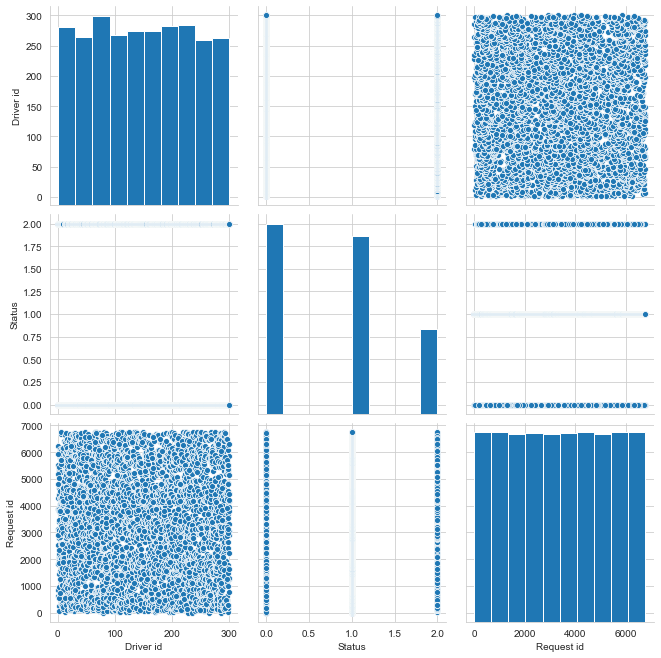

In [257]:
import seaborn as sns
num_cols = ['Driver id', 'Status','Pickup point','Request id'] 
sns.pairplot(uber_data[num_cols], size=3)


'Pickup point'

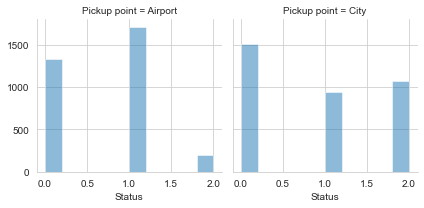

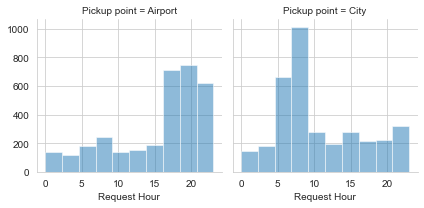

In [258]:
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
  
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.5)
    return grid_col


plot_cols2 = ["Status","Request Hour"]

cond_hists(uber_data, plot_cols2, 'Pickup point')

In [259]:
# fig=plt.figure(figsize=(5,5))

# X=uber_data['Status']
# Y=uber_data['Driver id']

# plt.plot(X,Y)

# plt.title('Line Plot')
# plt.xlabel('Status')
# plt.ylabel('Driver id')

# plt.show()

In [260]:
#graph=plt.bar(uber_data['Status'], uber_data['Driver id'], color='violet')